# Hello, world!

Welcome to the Data Science Club's first prediction contest of the year! The club board wrote this starter code to give beginners to programming some already working code examples as a foundation for this contest.

Our goals for this project:
 - Expose club members to important data science concepts and terminology. Since this field is so diverse, rapidly changing and growing, there exists a lot of overlapping terminology with many terms meaning the same thing (i.e. predictor variable vs. input variable vs. feature vs. independent variable). We've done our best to use consistent terminology to avoid confusion in this notebook!
 - Provide working code that serves as a foundation for future projects/exploration of this project
 - Take concepts from data science and apply it to something fun and outside the box! Who knew that predicting real love on reality TV would be so difficult?

<img src = "images/machine_learning_xkcd.png">

While to a lot of us data science feels like trying to understand amortization schedules in FY accounting, we hope to help demystify some of these concepts using intuitive and relevant examples.

# Table of Contents:
* [The Bachelor Forecasting Challenge](#The-Bachelor-Forecasting-Challenge)
 * [Goals of Statistical Learning](#Goal-of-Statistical-Learning)
 * [Prediction and Inference](#Prediction-and-Inference)
* [Python](#Python)
 * [Load Packages](#Load-Packages)
 * [Load Data](#Load-Data)
* [Data Cleaning and Manipulation](#Data-Cleaning-and-Manipulation)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Linear Regression](#Linear-Regression)
 * [R-squared and Adjusted R-squared](#R-squared-&-Adjusted-R-squared)
 * [Regression Coefficients](#Regression-Coefficients)
 * [Standard Error and Hypothesis Tests](#Standard-Error-and-Hypothesis-Tests)
 * [p-values](#p-values )
 * [Interpretation of Model Summary](#Interpretation-of-Model-Summary)
* [Penalized Regressions](#Penalized-Regressions)
 * [Model Complexity and the Bias-Variance Tradeoff](#Model-Complexity-and-the-Bias-Variance-Tradeoff)
 * [Penalization / Regularization](#Penalization-/-Regularization)
 * [Standardized Data](#Standardized-Data)
 * [Model Parameters vs. Complexity Parameters](#Model-Parameters-vs.-Complexity-Parameters)
 * [Training, Validation, and Test Data](#Training,-Validation,-and-Test-Data)
 * [Shortcomings of Train/Validate Splits and Cross-Validation](#Shortcomings-of-Train/Validate-Splits-and-Cross-Validation)
 * [Lasso Regression](#Lasso-Regression)
 * [Summary of Penalized Regression](#Summary-of-Penalized-Regression)
* [Ordinal Logistic Regression](#Ordinal-Logistic-Regression)
* [Wrap Up](#Wrap-Up)
 * [Data Prep to Make Predictions](#Data-Prep-to-Make-Predictions)
 * [Making Predictions](#Making-Predictions)
 * [Save and Submit your Predictions](#Save-and-Submit-your-Predictions)

# The Bachelor Forecasting Challenge

For our first project, we will be working with data found on contestants from ABC's [The Bachelor](https://en.wikipedia.org/wiki/The_Bachelor_(American_TV_series)). For this project, the data was obtained from [FiveThirtyEight's GitHub page](https://github.com/fivethirtyeight/data/tree/master/bachelorette) and from [data.world](https://data.world/aerispaha/the-bachelor-contestants). 

## Goal of Statistical Learning

Our goal is to accurately predict the week that contestants are eliminated from the show (as early as Week 1 all the way to Week 10). We will be using contestant information such hometown, occupation, age, and performance on the first episode of each season to try and predict how long they will last on the show, otherwise known at their *Elimination Week*.

In other words, our goal is to come up with a function that takes in observations of input/predictor variables (such as age, occupation, hometown) and outputs a prediction for a variable of interest (Elimination Week). 

Before diving in to the code and data, let's take a look at an example to motivate this problem!


### Example
 
To use a B-school example, let's say that we want to forecast the sales of a product (our response variable) based upon our ad spend for that product and the ad spend our competitor's equivalent product (our two predictor variables). Here's some sample data for 5 months of sales:

| Sales - $ Y $ | Our Ad Spend - $ X_1$ | Competitor's Ad Spend - $X_2$ |
| :-: | :-: | :-: |
| 62,543 | \$1,045,000 | \$1,932,000 |
| 64,567 | \$1,206,000 | \$2,130,000 |
| 59,905 | \$1,113,000 | \$2,110,000 |
| 56,012 | \$1,099,000 | \$2,455,000 | 
| 63,996 | \$1,305,000 | \$2,005,000 |

Using the above data, we want to estimate future sales as accurately as possible using the data we have on hand (our ad spend and our competitor's ad spend) we so can optimize our ad spend to maximize profits.

Mathematically, this is represented as:

$ \hat{Y} = \hat{f}(X) $

where:
 - $ \hat{Y} $ : prediction for our output variable (AKA **response variable**), so in this example, the response variable is unit sales
 - $ X $ : a matrix of our **predictor variables** (each variable is column in this table, each row is a month of data on ad spend)
 - $ \hat{f}(X) $ : our **function** that will transform our input variables into our output variable
 
**Note**: The little hats over the letters in the notation mean "estimate". We are estimating future values of $Y$ (our predictions) by coming up with our best estimate of the "true relationship" ($f$) between our predictor variables and our response variable. We denote this "best estimate" with $\hat{f}$, since we are trying to estimate the true function itself. Think of it like when Isaac Newton was coming up with his best approximation for the law of gravitation. He found a nearly perfect representation of the gravitational attaction between two objects using their masses and distance between them as predictor variables. 

$ Y = \hat{f}(m_1, m_2, R) $

where
 - $Y$ is the gravitiational attraction between two objects
 - $m_1$ and $m_2$ are the masses of the two objects
 - $R$ is the distance between the two objects
 - $\hat{f}$ is the estimate of the true relationship between these three predictor variables and the response variable
  - $\hat{f} = 9.81 \frac{m_1 m_2}{R^2}$

It wasn't until centuries later that Einstein found something that more was closer to the "true relationship" with his theory of general relativity.

## Prediction and Inference

A large part of machine learning is using different approaches to estimate the "true function" $f$ using past data. Why do we care about this? Estimating $f$ allows us to do things: **prediction** and **inference**.

**Prediction** - We care less about interpretting the practical meaning of $\hat{f}$ and care solely about the predictive accuracy of our model. 

**Inference** - We care more about interpretting the relationships between our predictor variables and our response variable. We could use this information to ask future strategic questions to improve outcomes, such as understanding the underlying relationship between ad spend and unit sales in order to maximize profits.

Inference often goes hand in hand with **explainability**, or the relative ease of which a data scientist can explain how the model is making predictions and interpret the relationships between predictor variables and the response variable. Certain modeling methods are inherently more complex than other, but often can lead to more accurate results. Thus, we have this inverse relationship between accuracy and explainability, as shown below:

<img src = "images/Accuracy_v_Explainability.jpg">

<h4 align="center"> Source: Preet Gandhi - KDnuggets - https://www.kdnuggets.com/2019/01/explainable-ai.html </h4> 

For our notebook today, we will be looking at a few different **Regression Algorithms**:
 - Ordinary Least Squares (OLS) regression (AKA linear regression)
 - Penalized Regression (Lasso in particular)
 - Ordinal Regression
 
These are all methods used to come up with an estimate $\hat{f}$ for the true function $f$ using past data to "train" our model. Since we have a variety of different methods to try, we need a way to compare the performance of these methods against one another. To do so, we will be assessing the performance of our models using Mean Squared Error:

$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $

where:
 - $ n $ : the number of **observations**, or number of rows in our data
 - $ y $: the true value of **response variable**
 - $ \hat{y} $: our **predicted value** of the response variable
 
Without further ado, let's dive into the coding and the data!

# Python

In recent years, Python has become the primary language of choice for data scientists. This is largely due to:
 - The relative ease of learning the language compared to other programming languages
 - It's [open source](https://opensource.com/resources/what-open-source) so anyone can contribute to it and access it for free
 - Vast libraries of optimized code to make a data scientist's life easier
 
<img src = 'images/python.png'>

Another popular choice for data scientists is [R](https://www.r-project.org/about.html), but honestly I am using Python for this exercise because I don't wish that evil on anyone. Python is just way cooler. If you want a real analysis of the pros/cons of each langauge, check out this post on [KDnuggets](https://www.kdnuggets.com/2015/05/r-vs-python-data-science.html).

## Load Packages

Data scientists will usually start each notebook by importing a set of packages that contain already written code that will make our lives way easier. You can think of these packages like a collection of helper functions that an expert programmer already wrote so you don't have to! Each package that we import will serve a particular purpose. Some packages specialize in manipulating data (i.e. [pandas](https://pandas.pydata.org/) and [numpy](https://numpy.org/)), others specialize in visualizing data (i.e. [seaborn](https://seaborn.pydata.org/index.html) and [matplotlib](https://matplotlib.org/)), others specialize in machine learning applications ([sklearn](https://scikit-learn.org/stable/) and [tensorflow](https://www.tensorflow.org/)), etc. 

The one the main benefits of importing this code is so that we don't have to reinvent the wheel! Why write something like a function from scratch that someone else has already done (and probably done much better than we could do ourselves!). These packages are open source as well, so anyone can contribute to these to improve upon existing code or to add new functionality. 

These are the packages we will be using in this analysis. Data scientists typically import the packages of their choosing at the beginning of each notebook for organizational purposes. If they realize they need to import something new, they will scroll back up to the top and add a new import statement into this cell.

In [1]:
#To manipulate datasets efficiently
import pandas as pd
import numpy as np

#Do regular expression matching
import re

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#To do exploratory data analysis
from pandas_profiling import ProfileReport

#To do geospatial analysis
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance as gp_distance
from geopy import Point

#Regressions
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import mord #for Ordinal Logistic Regression

#More data manipulation and scoring metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

**Note**: If you are getting an error that says something like `Module not found`, then you will first need to download and install the package. Luckily, Python has a very easy way to do this! You can install any missing packages by running `!pip install <package_name>` in your notebook. Pip is a python package installer that will automatically find the source code for the package you want to use, download it, and install it.

In [ ]:
#Run this cell to install any missing packages, just replace "pandas_profiling" with the missing package name
!pip install pandas_profiling

You'll notice two main types of syntax above:
 - `import <package> as <alias>`
 - `from <package> import <function>`

The syntax `import <package> as <alias>` is telling python to load *all of the functions* that exist within a particular package. We can give the package an **alias**, or a shorthand name so we don't have to write `pandas` everytime we want to use a function from that package, we can simply write `pd`.

The syntax `from <package> import <function>` is telling python to load *only one specific function* from the package. Some packages can contain hundreds of functions and we may not need all of them for our analysis. This allows us to have more of an a la carte approach than an all-you-can-eat approach.

## Load Data

### Contestants Data

Now we'll start by loading in the data on our contestants from a csv ("comma separated value") file. Csv files are a common data format that data scientists work with, and thankfully `pandas` already has a built-in function that will read the csv file into a Pandas DataFrame.

Pandas DataFrames are a tabular data structure that allow us to easily manipulate data in python. With pandas we can:
 - Load data in from various file formats (csv, Excel, txt)
 - Display our data
 - Create new columns in our dataset
 - Drop rows
 - Fill in missing values
 - Aggregate data into pivot tables
 - Join datasets together
 - Much, much more!

In [2]:
#This will load our csv file into a Pandas DataFrame
contestants_df = pd.read_csv('bachelor-contestants.csv')

When using a function like `read_csv` from the pandas package, we call the function with `<package_name/abbreviation>.<function_name>` or `pd.read_csv`. If we just imported one function from a package instead of the whole package, you can simply call the fuction with `read_csv`.

Python functions often have a lot of different options built in to the function that accomplish certain tasks. You can easily read the documentation on a function by using a "?" before the function name. Some functions have more documentation than others, depending on how lazy the developers were :)

In [3]:
#Get the documentation for a function
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

That was a lot of documentation! You won't always have to read this, but when working with new functions reading the documentation will help you understand how to use a function as the developers intended.

Let's look at the result here by printing out the first 5 rows using the `head` attribute from pandas.

In [4]:
contestants_df.head()

,Name,Age,Occupation,Function,Hometown,Height,ElimWeek,Season,First_Impression_Rose
0,Amanda Marsh,23.0,Event Planner,Retail/Services/Entrepreneur,"Chanute, Kansas",NaN,7,1,0
1,Trista Rehn,29.0,Miami Heat Dancer,Arts/Entertainment,"Miami, Florida",NaN,6,1,0
2,Shannon Oliver,24.0,Financial Management Consultant,Finance,"Dallas, Texas",NaN,5,1,0
3,Kim,24.0,Nanny,Retail/Services/Entrepreneur,"Tempe, Arizona",NaN,4,1,0
4,Cathy Grimes,22.0,Graduate Student,Student,"Terra Haute, Indiana",NaN,3,1,0


We can look at a specific number of rows by passing in the number of rows we wish to see into `head`:

In [5]:
#Look at the first 15 rows
contestants_df.head(15)

,Name,Age,Occupation,Function,Hometown,Height,ElimWeek,Season,First_Impression_Rose
0,Amanda Marsh,23.0,Event Planner,Retail/Services/Entrepreneur,"Chanute, Kansas",NaN,7,1,0
1,Trista Rehn,29.0,Miami Heat Dancer,Arts/Entertainment,"Miami, Florida",NaN,6,1,0
2,Shannon Oliver,24.0,Financial Management Consultant,Finance,"Dallas, Texas",NaN,5,1,0
3,Kim,24.0,Nanny,Retail/Services/Entrepreneur,"Tempe, Arizona",NaN,4,1,0
4,Cathy Grimes,22.0,Graduate Student,Student,"Terra Haute, Indiana",NaN,3,1,0
5,Christina,28.0,Attorney,Legal,"Bonita, California",NaN,3,1,0
6,LaNease Adams,23.0,Actress,Arts/Entertainment,"Los Angeles, California",NaN,3,1,0
7,Rhonda,28.0,Commercial Real Estate Agent,Real Estate,"Woodward, Oklahoma",NaN,3,1,0
8,Alexa,27.0,Special Ed. Teacher,Education,"Beverly Hills, California",NaN,2,1,0
9,Amy,28.0,Production Coordinator,Arts/Entertainment,"New York, New York",NaN,2,1,0


The `summarize_dataframe` function will allow us to get a nice summary table of our data. This is an example of a user-defined function, originally written by Darden's Prof. Albert. I won't go into the nitty gritty in explaining the code here, but generally we define a function by giving it a name (`summarize_dataframe`) as well as the inputs it expects to recieve (just `df` in this case).

In [6]:
#Define the function 
#Function originally written by Prof. Michael Albert
def summarize_dataframe(df):
    """Summarize a dataframe, and report missing values."""
    missing_values = pd.DataFrame({'Variable Name': df.columns,
                                   'Data Type': df.dtypes,
                                   'Missing Values': df.isnull().sum(),
                                   'Unique Values': [df[name].nunique() for name in df.columns]}
                                 ).set_index('Variable Name')
    with pd.option_context("display.max_rows", 1000):
        display(pd.concat([missing_values, df.describe(include='all').transpose()], axis=1).fillna(""))

Now we can call this function and pass in any dataframe that we want to summarize! Let's use our `contestants_df`

In [7]:
summarize_dataframe(contestants_df)

,Data Type,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Variable Name,,,,,,,,,,,,,,
Name,object,0,411,423.0,411,Angela,3,,,,,,,
Age,float64,1,16,422.0,,,,26.3389,2.77696,21,24,26,28,36
Occupation,object,0,306,423.0,306,Attorney,13,,,,,,,
Function,object,0,15,423.0,15,Arts/Entertainment,72,,,,,,,
Hometown,object,0,356,423.0,356,"Dallas, Texas",7,,,,,,,
Height,float64,393,13,30.0,,,,65.1083,2.34859,61,63.625,65,67,70
ElimWeek,int64,0,11,423.0,,,,3.40898,2.64317,1,1,3,5,11
Season,int64,0,16,423.0,,,,12.9574,5.92993,1,10,14,18,21
First_Impression_Rose,int64,0,2,423.0,,,,0.0330969,0.179102,0,0,0,0,1


Some things to note:
 - The average age of a contestant on *The Bachelor* is 26 y/o
 - Average height is 5'5", but the majority of our dataset is missing information on height
 - 50% of contestants are eliminated by week 2, and 75% eliminated by week 5

The `ProfileReport` function from the `pandas_profiling` package gives us a great overview of our dataset without having to write too much code. Here we can see common values, the distributions of our data.
 

In [8]:
profile = ProfileReport(df = contestants_df, minimal = True
                       )
profile.to_notebook_iframe()

Other takeaways:
 - Age looks to be centered around 25, with contestants as young as 21 or as old as 36
 - The top professions of contestants are Attorneys (look out JD/MBAs!), Nannies, Flight Attendants, Teachers, and Students
 - Dallas, Chicago, Houston, LA, and Seattle are the top hometowns where contestants come from.
 - The histogram on seasons is misleading since some bins contain multiple seasons

### Bachelor Data

In [9]:
bachelor_df = pd.read_csv('bachelors.csv')

Let's get an overview of this data as well with our `summarize_dataframe` function

In [10]:
summarize_dataframe(bachelor_df)

,Data Type,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Variable Name,,,,,,,,,,,,,,
Name,object,0,15,16.0,15,Brad Womack,2,,,,,,,
Age,int64,0,9,16.0,,,,31.4375,3.18264,26,28,32,34,36
Hometown,object,0,15,16.0,15,"Austin, Texas",2,,,,,,,
Height,float64,14,2,2.0,,,,75.5,2.12132,74,74.75,75.5,76.25,77
Season,int64,0,16,16.0,,,,12.6875,6.11794,1,9.75,13.5,17.25,21


Let's also get a sense for the dimensions of our data, or the number of rows and columns. We can use the `.shape` attribute of a dataframe to print this information.

In [11]:
bachelor_df.shape

(16, 5)

We can see that our bachelor dataframe has 16 rows and 5 columns.

Since our dataset is so small, we can simply put `bachelor_df` to print the data out to the screen

In [12]:
bachelor_df

,Name,Age,Hometown,Height,Season
0,Alex Michel,32,"Charlottesville, Virginia",NaN,1
1,Aaron Buerge,28,"Butler, Missouri",NaN,2
2,Jesse Palmer,34,"Toronto, Ontario",NaN,5
3,Lorenzo Borghese,34,"Milan, Italy",NaN,9
4,Andy Baldwin,30,"Lancaster, Pennsylvania",NaN,10
5,Brad Womack,35,"Austin, Texas",NaN,11
6,Matt Grant,27,"London, England",NaN,12
7,Jason Mesnick,33,"Cleveland, Ohio",NaN,13
8,Jake Pavelka,32,"Dallas, Texas",NaN,14
9,Brad Womack,35,"Austin, Texas",NaN,15


# Data Cleaning and Manipulation

In both datasets, height doesn't seem to be very consistently populated. For the sake of this analysis, let's drop this drop from each dataset

In [13]:
#Axis = 1 tells Pandas to look at column labels, Axis = 0 tells Pandas to look at row labels
contestants_df = contestants_df.drop('Height', axis = 1)

In [14]:
bachelor_df = bachelor_df.drop('Height', axis = 1)

In [15]:
contestants_df

,Name,Age,Occupation,Function,Hometown,ElimWeek,Season,First_Impression_Rose
0,Amanda Marsh,23.0,Event Planner,Retail/Services/Entrepreneur,"Chanute, Kansas",7,1,0
1,Trista Rehn,29.0,Miami Heat Dancer,Arts/Entertainment,"Miami, Florida",6,1,0
2,Shannon Oliver,24.0,Financial Management Consultant,Finance,"Dallas, Texas",5,1,0
3,Kim,24.0,Nanny,Retail/Services/Entrepreneur,"Tempe, Arizona",4,1,0
4,Cathy Grimes,22.0,Graduate Student,Student,"Terra Haute, Indiana",3,1,0
...,...,...,...,...,...,...,...,...
418,Sarah,26.0,Grade School Teacher,Education,"Newport Beach, CA",4,21,0
419,Susannah,26.0,Account Manager,Sales,"San Diego, CA",1,21,0
420,Taylor,23.0,Mental Health Counselor,Medical,"Seattle, WA",5,21,0
421,Vanessa,29.0,Special Education Teacher,Education,"Montreal, Quebec, Canada",11,21,0


Let's also try to calculate the distance between a contestant's and Bachelor's Hometowns to see if that has any affect on a constestant's success. This will take a few minutes to run, since it is calling an external [API](https://en.wikipedia.org/wiki/API) (just a way for two programs to talk to one another) for each row in the dataset.

Don't worry about understanding the code here. Most of it was copy-pasted from [stack overflow](https://stackoverflow.com/questions) anyways. 

*Sidebar*: If you can't find an answer from looking at documentation, a good next step it to type your problem into Google. 99% of the time someone else has asked the same question you have on stack overflow, a programming forum, where expert programmers will (usually) kindly respond to your programming dilemma.

<img src = 'images/stack_overflow.png'>

In [16]:
locator = Nominatim(user_agent="BachelorGeocoder")
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.01)

In [17]:
#Run this for contestants

# create location column
contestants_df['location'] = contestants_df['Hometown'].apply(geocode)
# create longitude, laatitude and altitude from location column (returns tuple)
contestants_df['point'] = contestants_df['location'].apply(lambda loc: tuple(loc[1]) if loc else None)
# split point column into latitude, longitude columns
contestants_df[['latitude', 'longitude']] = pd.DataFrame(contestants_df['point'].tolist(), index=contestants_df.index)

In [18]:
#Run this for Bachelors

# create location column
bachelor_df['location'] = bachelor_df['Hometown'].apply(geocode)
# create longitude, laatitude from location column (returns tuple)
bachelor_df['point'] = bachelor_df['location'].apply(lambda loc: tuple(loc[1]) if loc else None)
# split point column into latitude, longitude columns
bachelor_df[['latitude', 'longitude']] = pd.DataFrame(bachelor_df['point'].tolist(), index=bachelor_df.index)

In [19]:
contestants_df = contestants_df.drop(['latitude','longitude','location'], axis = 1)

In [20]:
bachelor_df = bachelor_df.drop(['latitude','longitude','location'], axis = 1)

Let's see if whether or not a candidate is from the U.S. has an impact. We'll start by getting the state/country value from the contestant hometown

In [21]:
contestants_df['State/Country'] = contestants_df['Hometown'].str.split(',').str[1]

Now let's add some logic to flag contestants who are international:

In [22]:
#Regex search terms for non-US countries
non_us_terms = ['Quebec','Italy','British Columbia','Alberta','Pernambuco','England','Brazil','Ontario']
    
#Logic to check State/Country for regex terms. Returns 1 (US) or 0 (non=US)    
contestants_df['International_Flag'] = ((contestants_df['State/Country'].str.contains('|'.join(non_us_terms))) | (contestants_df['State/Country'].isna())).astype(int)

In [23]:
contestants_df = contestants_df.drop(['State/Country'], axis = 1)

Now let's do the same for the Bachelors

In [24]:
bachelor_df['State/Country'] = bachelor_df['Hometown'].str.split(',').str[1]

In [25]:
#Logic to check State/Country for regex terms. Returns 1 (US) or 0 (non=US)    
bachelor_df['International_Flag'] = (bachelor_df['State/Country'].str.contains('|'.join(non_us_terms)) | bachelor_df['State/Country'].isna()).astype(int)

In [26]:
bachelor_df = bachelor_df.drop(['State/Country'], axis = 1)

Let's join these datasets together with `pd.merge` on season. But before doing so, let's rename some of these columns so that we don't have duplicates in our new dataframe.

In [27]:
#Mapping of old names (on left) and new names (on right)
contestant_rename_map = {'Name':'Contestant_Name',
                        'Age':'Contestant_Age',
                        'Hometown':'Contestant_Hometown',
                        'point':'Contestant_Hometown_Coordinates',
                        'International_Flag':'Contestant_International_Flag'}

#Rename the columns in the dataframe, axis = 1 is telling Pandas to look at column labels
contestants_df = contestants_df.rename(contestant_rename_map, axis = 1)

In [28]:
#Mapping of old names (on left) and new names (on right)
bachelor_rename_map = {'Name':'Bachelor_Name',
                        'Age':'Bachelor_Age',
                        'Hometown':'Bachelor_Hometown',
                        'point':'Bachelor_Hometown_Coordinates',
                        'International_Flag':'Bachelor_International_Flag'}

#Rename the columns in the dataframe, axis = 1 is telling Pandas to look at column labels
bachelor_df = bachelor_df.rename(bachelor_rename_map, axis = 1)

Now let's merge these datasets together now that we have unique column names.

In [29]:
merged_df = contestants_df.merge(bachelor_df, on = 'Season')

Looks like there is one contestant, Cosetta Blanca, whose age is null. Let's replace (AKA "impute") that null value with the median age of the other contestants.

In [30]:
merged_df[merged_df['Contestant_Age'].isna()]

,Contestant_Name,Contestant_Age,Occupation,Function,Contestant_Hometown,ElimWeek,Season,First_Impression_Rose,Contestant_Hometown_Coordinates,Contestant_International_Flag,Bachelor_Name,Bachelor_Age,Bachelor_Hometown,Bachelor_Hometown_Coordinates,Bachelor_International_Flag
96,Cosetta Blanca,NaN,Dancer,Arts/Entertainment,"Venice, Italy",1,9,0,"(45.4371908, 12.3345898)",1,Lorenzo Borghese,34,"Milan, Italy","(45.4668, 9.1905)",1


In [31]:
merged_df.loc[merged_df['Contestant_Age'].isna(), 'Contestant_Age'] = merged_df['Contestant_Age'].median()

Now we have Bachelor and contestant data in one dataframe! Let's try adding some additional columns that may give us more information about potential relationships between a contestant and the Bachelor that season.

In [32]:
#Calculate the age difference between a Bachelor and the contestant
merged_df['Age_Difference'] = merged_df['Bachelor_Age'] - merged_df['Contestant_Age']

# Exploratory Data Analysis

Let's look at the distribution of age difference between the contestants and their respective bachelors. We can use the `seaborn` package with the alias `sns` to plot this data. We'll use the `histplot` function to plot a histogram of the age differences

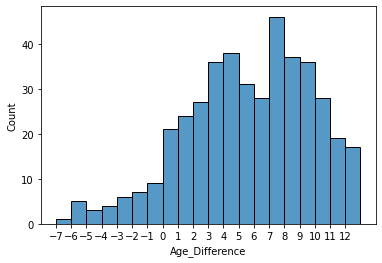

In [33]:
g = sns.histplot(merged_df['Age_Difference'], binwidth = 1)
g.set_xticks(range(int(merged_df['Age_Difference'].min()),int(merged_df['Age_Difference'].max())))

Above is a histogram showing the distribution of age differences between the Bachelor and the contestant. 

Let's calculate the distance between contestants and the Bachelor for that season

In [34]:
#Calculate the distances between a contestant's hometown and the bachelor's
merged_df['Hometown_Distance'] = merged_df.apply(lambda row: gp_distance.distance(row['Contestant_Hometown_Coordinates'], row['Bachelor_Hometown_Coordinates']).miles, axis = 1)

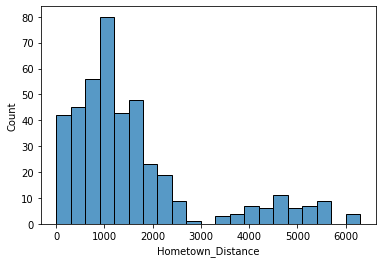

In [35]:
g = sns.histplot(merged_df['Hometown_Distance'])

Unsurprisingly, there are two modes to this distribution. The one on the left is (usually) associated with contestants from North America and the one on the right represents international contestants, with the exception of a couple of seasons where the Bachelor was from Europe:

In [36]:
bachelor_df[bachelor_df['Bachelor_International_Flag']==1]

,Bachelor_Name,Bachelor_Age,Bachelor_Hometown,Season,Bachelor_Hometown_Coordinates,Bachelor_International_Flag
2,Jesse Palmer,34,"Toronto, Ontario",5,"(43.6534817, -79.3839347)",1
3,Lorenzo Borghese,34,"Milan, Italy",9,"(45.4668, 9.1905)",1
6,Matt Grant,27,"London, England",12,"(51.5073219, -0.1276474)",1


Finally, let's create a column `Winner?` for the contestants if they win the Bachelor for that season

In [37]:
winner_lookup_table = merged_df.groupby(['Season'])['ElimWeek'].max().reset_index()

#Drop the row for Season 11 since there were no winners on this season

winner_lookup_table = winner_lookup_table[winner_lookup_table['Season']!=11]

In [38]:
lookup_df = merged_df.merge(winner_lookup_table, how = 'left', on = 'Season').fillna(0)
lookup_df

,Contestant_Name,Contestant_Age,Occupation,Function,Contestant_Hometown,ElimWeek_x,Season,First_Impression_Rose,Contestant_Hometown_Coordinates,Contestant_International_Flag,Bachelor_Name,Bachelor_Age,Bachelor_Hometown,Bachelor_Hometown_Coordinates,Bachelor_International_Flag,Age_Difference,Hometown_Distance,ElimWeek_y
0,Amanda Marsh,23.0,Event Planner,Retail/Services/Entrepreneur,"Chanute, Kansas",7,1,0,"(37.6792135, -95.4572034)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,9.0,927.593707,7.0
1,Trista Rehn,29.0,Miami Heat Dancer,Arts/Entertainment,"Miami, Florida",6,1,0,"(25.7741728, -80.19362)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,3.0,850.362543,7.0
2,Shannon Oliver,24.0,Financial Management Consultant,Finance,"Dallas, Texas",5,1,0,"(32.7762719, -96.7968559)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,8.0,1093.385332,7.0
3,Kim,24.0,Nanny,Retail/Services/Entrepreneur,"Tempe, Arizona",4,1,0,"(33.4255056, -111.9400125)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,8.0,1897.338687,7.0
4,Cathy Grimes,22.0,Graduate Student,Student,"Terra Haute, Indiana",3,1,0,"(39.5036469, -87.443632)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,10.0,494.583633,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Sarah,26.0,Grade School Teacher,Education,"Newport Beach, CA",4,21,0,"(33.6170092, -117.9294401)",0,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,10.0,1743.336774,11.0
419,Susannah,26.0,Account Manager,Sales,"San Diego, CA",1,21,0,"(32.7174202, -117.1627728)",0,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,10.0,1738.074660,11.0
420,Taylor,23.0,Mental Health Counselor,Medical,"Seattle, WA",5,21,0,"(47.6038321, -122.3300624)",0,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,13.0,1691.279448,11.0
421,Vanessa,29.0,Special Education Teacher,Education,"Montreal, Quebec, Canada",11,21,0,"(45.4972159, -73.6103642)",1,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,7.0,729.074540,11.0


In [39]:
#Let's rename the columns to avoid confusion
lookup_df = lookup_df.rename({'ElimWeek_x':'ElimWeek',
                  'ElimWeek_y':'MaxElimWeek'}, axis = 1)

#We'll cast this column as an integer using the astype function
lookup_df['Winner?'] = (lookup_df['ElimWeek'] == lookup_df['MaxElimWeek']).astype(int)

lookup_df = lookup_df.drop(['MaxElimWeek'], axis = 1)

In [40]:
merged_df = lookup_df

In [41]:
merged_df

,Contestant_Name,Contestant_Age,Occupation,Function,Contestant_Hometown,ElimWeek,Season,First_Impression_Rose,Contestant_Hometown_Coordinates,Contestant_International_Flag,Bachelor_Name,Bachelor_Age,Bachelor_Hometown,Bachelor_Hometown_Coordinates,Bachelor_International_Flag,Age_Difference,Hometown_Distance,Winner?
0,Amanda Marsh,23.0,Event Planner,Retail/Services/Entrepreneur,"Chanute, Kansas",7,1,0,"(37.6792135, -95.4572034)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,9.0,927.593707,1
1,Trista Rehn,29.0,Miami Heat Dancer,Arts/Entertainment,"Miami, Florida",6,1,0,"(25.7741728, -80.19362)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,3.0,850.362543,0
2,Shannon Oliver,24.0,Financial Management Consultant,Finance,"Dallas, Texas",5,1,0,"(32.7762719, -96.7968559)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,8.0,1093.385332,0
3,Kim,24.0,Nanny,Retail/Services/Entrepreneur,"Tempe, Arizona",4,1,0,"(33.4255056, -111.9400125)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,8.0,1897.338687,0
4,Cathy Grimes,22.0,Graduate Student,Student,"Terra Haute, Indiana",3,1,0,"(39.5036469, -87.443632)",0,Alex Michel,32,"Charlottesville, Virginia","(38.029306, -78.4766781)",0,10.0,494.583633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Sarah,26.0,Grade School Teacher,Education,"Newport Beach, CA",4,21,0,"(33.6170092, -117.9294401)",0,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,10.0,1743.336774,0
419,Susannah,26.0,Account Manager,Sales,"San Diego, CA",1,21,0,"(32.7174202, -117.1627728)",0,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,10.0,1738.074660,0
420,Taylor,23.0,Mental Health Counselor,Medical,"Seattle, WA",5,21,0,"(47.6038321, -122.3300624)",0,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,13.0,1691.279448,0
421,Vanessa,29.0,Special Education Teacher,Education,"Montreal, Quebec, Canada",11,21,0,"(45.4972159, -73.6103642)",1,Nick Viall,36,"Milwaukee, WI","(43.0349931, -87.922497)",0,7.0,729.074540,1


Now let's look at aggregating our data. In pandas, we can use the `groupby` function to aggregate our data with a variety of aggregation functions (i.e. count, max, min, sum, average). 

Let's look at the categories of functions that contestants work in:

In [42]:
merged_df.groupby(['Function'])['Function'].count()

Function
Arts/Entertainment              72
Corporate                       24
Education                       29
Finance                         14
Government                       6
Legal                           19
Marketing                       18
Medical                         44
Misc                            13
Real Estate                     17
Restaurant                      20
Retail/Services/Entrepreneur    71
Sales                           43
Student                         23
Transportation                  10
Name: Function, dtype: int64

Now let's get the number of times a contestant won a season by category:

In [43]:
merged_df.groupby(['Function'])['Winner?'].sum()

Function
Arts/Entertainment              3
Corporate                       1
Education                       3
Finance                         0
Government                      1
Legal                           0
Marketing                       1
Medical                         2
Misc                            0
Real Estate                     0
Restaurant                      0
Retail/Services/Entrepreneur    1
Sales                           1
Student                         1
Transportation                  1
Name: Winner?, dtype: int32

Here's the percetange of times contestants have won from each industry

In [44]:
merged_df.groupby(['Function'])['Winner?'].sum() / merged_df.groupby(['Function'])['Function'].count()

Function
Arts/Entertainment              0.041667
Corporate                       0.041667
Education                       0.103448
Finance                         0.000000
Government                      0.166667
Legal                           0.000000
Marketing                       0.055556
Medical                         0.045455
Misc                            0.000000
Real Estate                     0.000000
Restaurant                      0.000000
Retail/Services/Entrepreneur    0.014085
Sales                           0.023256
Student                         0.043478
Transportation                  0.100000
dtype: float64

Right now, our `Function` column can't be interpretted by a regression algorithm since it is text and not numeric. We need to do something about that! How can we convert this information into a format that a regression algorithm would understand?

We can convert this categorical data into numeric data by using something called "dummy encoding", or creating a column for each level in the category with a 1 if the contestant is in that category or 0 if they are not.

In [45]:
len(merged_df['Function'].unique())

15

Our Function column has 15 distinct levels. So we will need to convert this single Function column into 15 separate columns with Yes/No indicators of if a contestant came from a particular industry. We will use the `OneHotEncoder` function from the `sklearn` package to easily to this for us, rather than having to write this logic ourselves.

In [46]:
#Set up the dummy encoder
dummy_encoder = OneHotEncoder()

In [47]:
#Fit to our dataset (needs to be converted into a numpy array for this to work properly)
dummy_encoder.fit(np.array(merged_df['Function']).reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [48]:
#Creates our 15 distinct columns, one for each function, and does so for each contestant (423 contestants)
sparse_matrix = dummy_encoder.transform(np.array(merged_df['Function']).reshape(-1,1)).toarray()

Let's double check the dimensions of this matrix to make sure we have the correct number of rows and columns:

In [49]:
sparse_matrix.shape

(423, 15)

In [50]:
#Sum across all rows to make sure we don't get any values != 1, since all contestants should only belong to 1 function in our dataset
sparse_matrix.sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [51]:
sparse_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Looks good! When working with new functions it's best practice to double check your assumptions with a few quick checks to make sure everything worked as intended.

In [52]:
#Convert this into a pandas dataframe so we can join it back with the merged_df
sparse_df = pd.DataFrame(data = sparse_matrix, columns = dummy_encoder.categories_)

In [53]:
merged_df = merged_df.merge(sparse_df, left_index = True, right_index = True)

In [54]:
merged_df

,Contestant_Name,Contestant_Age,Occupation,Function,Contestant_Hometown,ElimWeek,Season,First_Impression_Rose,Contestant_Hometown_Coordinates,Contestant_International_Flag,...,"(Legal,)","(Marketing,)","(Medical,)","(Misc,)","(Real Estate,)","(Restaurant,)","(Retail/Services/Entrepreneur,)","(Sales,)","(Student,)","(Transportation,)"
0,Amanda Marsh,23.0,Event Planner,Retail/Services/Entrepreneur,"Chanute, Kansas",7,1,0,"(37.6792135, -95.4572034)",0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Trista Rehn,29.0,Miami Heat Dancer,Arts/Entertainment,"Miami, Florida",6,1,0,"(25.7741728, -80.19362)",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Shannon Oliver,24.0,Financial Management Consultant,Finance,"Dallas, Texas",5,1,0,"(32.7762719, -96.7968559)",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kim,24.0,Nanny,Retail/Services/Entrepreneur,"Tempe, Arizona",4,1,0,"(33.4255056, -111.9400125)",0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Cathy Grimes,22.0,Graduate Student,Student,"Terra Haute, Indiana",3,1,0,"(39.5036469, -87.443632)",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Sarah,26.0,Grade School Teacher,Education,"Newport Beach, CA",4,21,0,"(33.6170092, -117.9294401)",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,Susannah,26.0,Account Manager,Sales,"San Diego, CA",1,21,0,"(32.7174202, -117.1627728)",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
420,Taylor,23.0,Mental Health Counselor,Medical,"Seattle, WA",5,21,0,"(47.6038321, -122.3300624)",0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,Vanessa,29.0,Special Education Teacher,Education,"Montreal, Quebec, Canada",11,21,0,"(45.4972159, -73.6103642)",1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#Clean up the column names by removing special characters like "(", ")", "," , and "''"
merged_df = merged_df.rename(columns = lambda x: re.sub(r'[(),\']',r'',str(x)))

#Replace spaces with underscores
merged_df = merged_df.rename(columns = lambda x: re.sub(r' ',r'_',str(x)))

#Replace slashes with underscores
merged_df = merged_df.rename(columns = lambda x: re.sub(r'/',r'_',str(x)))

Let's look at a correlation plot to visualize relationships between variables:

In [56]:
corr = merged_df.corr()

In [57]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

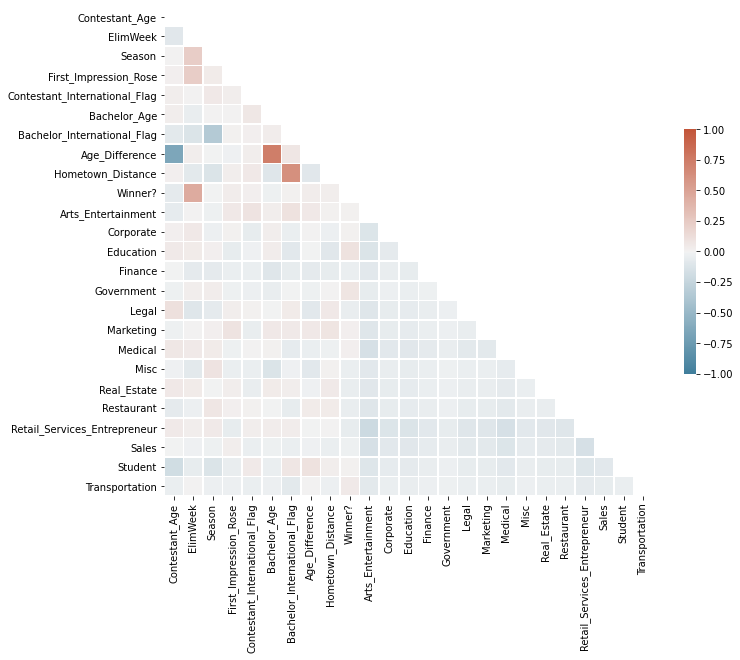

In [58]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can also look at this just by printing the dataframe

In [59]:
corr.iloc[:10,:10]

,Contestant_Age,ElimWeek,Season,First_Impression_Rose,Contestant_International_Flag,Bachelor_Age,Bachelor_International_Flag,Age_Difference,Hometown_Distance,Winner?
Contestant_Age,1.000000,-0.093568,0.006928,0.020355,0.029233,0.024597,-0.075256,-0.654931,0.018797,-0.069537
ElimWeek,-0.093568,1.000000,0.228497,0.231634,0.007268,-0.042328,-0.121814,0.031024,-0.076774,0.449641
Season,0.006928,0.228497,1.000000,0.041491,0.058860,0.003641,-0.341060,-0.001914,-0.120028,-0.005097
First_Impression_Rose,0.020355,0.231634,0.041491,1.000000,0.026467,0.007305,0.015464,-0.008188,0.023647,0.035981
Contestant_International_Flag,0.029233,0.007268,0.058860,0.026467,1.000000,0.066439,0.021957,0.030533,0.057320,0.022906
Bachelor_Age,0.024597,-0.042328,0.003641,0.007305,0.066439,1.000000,0.031433,0.739351,-0.097342,-0.019739
Bachelor_International_Flag,-0.075256,-0.121814,-0.341060,0.015464,0.021957,0.031433,1.000000,0.074447,0.620734,0.008928
Age_Difference,-0.654931,0.031024,-0.001914,-0.008188,0.030533,0.739351,0.074447,1.000000,-0.086243,0.031914
Hometown_Distance,0.018797,-0.076774,-0.120028,0.023647,0.057320,-0.097342,0.620734,-0.086243,1.000000,0.025763
Winner?,-0.069537,0.449641,-0.005097,0.035981,0.022906,-0.019739,0.008928,0.031914,0.025763,1.000000


We can explore the relationships between pairs of variables by using a scatterplot. Seaborn has a useful function called `scatterplot` that will allow us to easily plot the relationship between two columns within a pandas dataframe.

<AxesSubplot:xlabel='Age_Difference', ylabel='ElimWeek'>

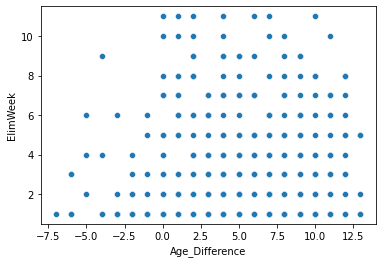

In [60]:
sns.scatterplot(x = merged_df['Age_Difference'], y = merged_df['ElimWeek'])

Seaborn also has a useful function called `regplot` that will not only plot the scatterplot of two variables, but will automatically calculate the line of best fit of the data and plot the confidence interval (parameter `ci`) around the line of best fit.

<AxesSubplot:xlabel='Hometown_Distance', ylabel='ElimWeek'>

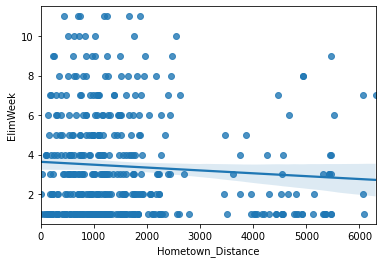

In [61]:
sns.regplot(x = merged_df['Hometown_Distance'], y = merged_df['ElimWeek'], ci = 95)

# Linear Regression

After all that work, we finally have our data in a format where we can start building some models! Let's kick things off by looking at Ordinary Least Squares Regression, AKA Linear Regression.

Linear Regressions fall under a broader class of models known as **Linear Models**. These models take the form of a weighted sum of predictor variables:

$ y = \beta_0 + \sum \beta_j x_j + \epsilon $

where:
 - $ x $ is a row of our $j$ predictor variables (i.e. a single contestants occupation, age, if they got a first impression rose or not, etc)
 - $ y $ is the response variable (the week a contestant is eliminated)
 - $ \beta_0 $ is the intercept of the model, or the default value of the response variable when all predictor variables equal zero
 - $ \beta_j $ is a coefficient for a predictor variable, with j total predictor variables, and indicates the relationship between a predictor variable and the response variable
 - $ \epsilon $ is the error term of our model, which we assume is normally-distributed with a mean of zero
 
To put this into terms of our model, let's say we want to use 3 predictor variables (AKA "features") to predict the elimination week:
 - Hometown Distance ($x_1$)
 - Age Difference ($x_2$)
 - First Impression Rose ($x_3$)
 
Our linear model would look like this:

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 $

The betas are the coefficients for each variable. Coefficients can be positive or negative and can us some information about the relationships between a predictor variable and the response variable.

To find the optimal $ \beta $ values, Linear Regression will pick $ \beta $s that minimize the **residuals** of our model, or the distance between our model's predictions and the actual values. More specifically, Linear Regression will minimize the squared values of these residuals, or the **Residual Sum of Squares** (RSS):

#### Math (totally optional)

Residuals: $\hat{\epsilon}_i = y_i - \hat{y}_i $

where:
 - $i$ is a single observation in our training data, with $n$ total observations
 - $y$ is the actual value for our response variable in the training data
 - $\hat{y}$ is our model's predction for the response variable given the training data

Residual Sum of Squares: $ RSS = \sum_{i}^n \hat{\epsilon}_i^2 $

We can also rewrite the above equation to include our $\beta$s, since our model's residuals will change depending on the $\beta$ values chosen. This shows us that **RSS is minimized in linear regression by changing the $\beta$s**:

$ RSS(\beta_0, \beta_1, \beta_2, \beta_3) = \sum_{i}^n (y_i - (\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3) )^2 $

#### Back to programming

Let's get started using the `statmodels` package, which has some great functionality for creating linear regression models in python.

We'll start by using the sub-package `OLS` from the statsmodels package, and from that we'll use the `from_forumla` function. This allows us to very easily define our linear regression model in terms of our response variable `ElimWeek` and our predictor variables `Hometown_Distance`, `Age_Difference`, and `First_Impression_Rose`. Note that the response variable is on the left-hand side of the formula and the predictor variables are on the right with a `+` sign between each one.

In [62]:
#Here we are simply defining the structure of our model
LinReg_Model1 = sm.OLS.from_formula(formula = 'ElimWeek ~ Hometown_Distance + Age_Difference + First_Impression_Rose', data = merged_df)

In [63]:
#Now we are telling statsmodels to fit the model to our data
LinReg_Model1_Results = LinReg_Model1.fit()

Let's write a quick function to calculate our model's Mean Squared Error:

In [64]:
def MSE(y_true, y_pred):
    """Returns the Mean Squared Error by passing the true values of the response variable (y_true) and a model's predicted values (y_pred)"""
    if len(y_true) != len(y_pred):
        print("Number of rows in predicted and true values do not match!")
    else:
        n = len(y_pred)
        MSE = ((y_true - y_pred)**2).sum() / n
        print(MSE)

In [66]:
#Generate our predicted values
LinReg_Model1_Predictions = LinReg_Model1_Results.predict(merged_df)

In [67]:
#Save our actual values into a variable
Y_True = merged_df['ElimWeek']

In [68]:
MSE(y_true = Y_True, y_pred = LinReg_Model1_Predictions)

6.544018761422121


Looks like our MSE is about 6.54. How does this compare with a very naive model, where we simply guess the average Elimation Week for every single contestant?

In [69]:
Naive_Predictions = np.repeat(merged_df['ElimWeek'].mean(), len(merged_df['ElimWeek']))

MSE(y_true = merged_df['ElimWeek'], y_pred = Naive_Predictions)

6.969848375612672


So it looks like we're doing slightly better than guessing the average (3.4 weeks) for all contestants.

In [70]:
#Now we can print and interpret the results with the summary function
print(LinReg_Model1_Results.summary())

                            OLS Regression Results                            
Dep. Variable:               ElimWeek   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     9.088
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           7.69e-06
Time:                        19:45:00   Log-Likelihood:                -997.52
No. Observations:                 423   AIC:                             2003.
Df Residuals:                     419   BIC:                             2019.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.44

That's a lot of information that the `summary` function gave us! Let's break this down step-by-step.

## R-squared & Adjusted R-squared

Let's start by looking at the `R-squared` and `Adj. R-squared`. In statistical terms, `R-squared` corresponds with how much variation in the data can be explained by the model we just built. In this case, about only 6.1% of the variability in the data can be explained by our model. The other 93.9% is explained by other information that we did not incorporate into our model, such as:
 - contestant height
 - if a contestant *is there for the right reasons*
 - about a billion other potential factors that might be able to explain "love" on a reality dating show

`Adj. R-squared` AKA Adjusted R-squared is very similar to R-squared, but it penalizes the model for every new predictor variable that you add. We'll discuss why this is important later, but *generally we prefer to look at Adjusted R-squared rather than R-squared* so we can penalize more complex models and prevent overfitting our model to our data.

## Regression Coefficients

Next, let's turn our attention to the middle part of the summary where we see our Intercept term and 3 predictor variables. 

The `coef` column corresponds to the **estimates of the true coefficients** of each of our predictor variables in our model. In laymens terms, it means that a 1 unit change in a particular variable will correspond to a change in the response variable by the value of the cofficient. Using our model, obtaining the `First_Impression_Rose` would result in a contestant staying around 3.4495 weeks longer than if they had not gotten the rose in the first week.

If we were to put this model into an equation, it would look like this:

$ $ElimWeek$ = 3.4484 -0.0002($Hometown Distance$) + 0.0167($Age Difference$) + 3.4495($First Impression Rose$) $

We could now use this formula to make predictions on our new contestants in the upcoming season!

Let's also calculate Mean Squared Error by defining our own function:

## Standard Error and Hypothesis Tests

The `std err` column tells us about the uncertainty in our estimate of each coefficient. Using the rule of thumb that $\pm$ 2 standard deviations will cover about 95% of the possible estimates of each coefficient, we can infer a lot from looking at the standard error. Looking at the `First_Impression_Rose`, our model says that our estimate for the impact that getting the first impression rose has on a contestant's duration on the show could be $3.4495 \pm 2*0.699$ weeks, or anywhere between 2.05 and 4.85 weeks. 

Looking at `Age_Difference`, our model says that the impact of a contestant having a 1 year larger age difference with the Bachlor could result in them staying between -0.0433 and 0.0767 weeks longer. This helps us build intuition that age difference probably does not make a big difference on how long a candidate stays on the show, since the model isn't even sure if they will stay longer or shorter because of an increase in age difference!

What was just described above is a more intuitive way to think about **hypothesis tests**. In statistics, we use hypothesis tests to make assertions about relationships between variables. For example, we can write a **null hypothesis** (written as $H_0$) for each of our predictor variables in the model stating that *there is no relationship between the predictor and the response variables*. This is equivalent to saying that a regression coefficient $ \beta_j = 0 $. We compare the null hypothesis with the **alternative hypothesis** (written as $H_A$), which would be the *there is some relationship between the predictor and response variable.*

Mathematically, this is written as:

 - Null Hypothesis: $ H_0: \beta_j = 0 $
 - Alt. Hypothesis: $ H_A: \beta_j \neq 0 $
 
In other words, we are saying that some predictor variable has a relationship with the response variable or does not. So how do we quantify something like this? For that, we look to p-values.

## p-values

The `P > |t|` is the **p-value** and tells us the probability that we would see a result as extreme or more extreme given a random sample. **Alternatively, it tells us the probability of us incorrectly rejecting our null hypothesis, which claims that there is no relationship between a given predictor variable and the response variable**. We can use the p-value to help us interpret which of our predictor variable(s) has a "significant" relationship with the response variable.

Smaller p-values indicate that the chance of seeing such a relationship between the predictor and response variables due to random chance is incredibly unlikely, thus there must be a relationship of some kind between the two variables. When we see such a small p-value (common thresholds are below 0.05 or 0.01), we will reject the null hypothesis in favor of the alternative hypothesis - that there must be some kind of relationship between the two variables.

**Note**: the choice of your *threshold for rejecting the null hypothesis* (also referred to as $ \alpha $) is *subjective*. For some circumstances where is can be costly to make assumptions about relationships between a predictor and response variable, we would want to choose a very small threshold for significance. In other contexts where it is less costly, we might be OK using a higher theshold, such as 0.1. 

As a data scientist, you should pick your $ \alpha $ before you run the model and interpret the results as to not bias your thinking.

## Interpretation of Model Summary

So, back to the interpretation of our results. We can see that getting the First Impression Rose has a strong impact on a contestant's ability to stay on the show from looking at the p-value for this predictor variable. We also see some evidence of the hometown distance contributing to a contestant's success on the show with a p-value of 0.093. While this is not less than 0.05, when dealing with challenging and complex problems like trying to predict love on a reality TV show, we might opt for using this as a feature to our model.

Age difference, with a p-value of 0.584, does not seem to have a significant relationship Elimination Week, so let's try removing this variable from our model and see if it improves our Adjusted R-squared to something higher than 0.054.

In [71]:
#Here we are simply defining the structure of our model, but remove Age_Difference as a predictor variable
LinReg_Model2 = sm.OLS.from_formula(formula = 'ElimWeek ~ Hometown_Distance + First_Impression_Rose', data = merged_df)

In [72]:
#Now we are telling statsmodels to fit the model to our data
LinReg_Model2_Results = LinReg_Model2.fit()

In [73]:
LinReg_Model2_Predictions = LinReg_Model2_Results.predict(merged_df)

In [74]:
#Print out the MSE of the model
MSE(Y_True, LinReg_Model2_Predictions)

6.548707106004252


In [75]:
#Now we can print and interpret the results with the summary function
print(LinReg_Model2_Results.summary())

                            OLS Regression Results                            
Dep. Variable:               ElimWeek   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     13.50
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           2.07e-06
Time:                        19:45:18   Log-Likelihood:                -997.68
No. Observations:                 423   AIC:                             2001.
Df Residuals:                     420   BIC:                             2013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.54

Overall, the Adjusted R-squared of our model slighlty improved from 0.054 to 0.056. Looks like we still have a ways to go to improve the performance of our model!

What if we decide to square the distance between a contestant's and Bachelor's hometowns? The idea behind making this transformation to this variable is that distance might be increasingly detrimental to a contestant the further the distance between their hometown and the Bachelor's due to cultural or regional differences.

To build this into our model, we will use `numpy`'s `power` function to raise `Hometown_Distance` to the power of 2.

In [76]:
#Here we are simply defining the structure of our model, but remove Age_Difference as a predictor variable
LinReg_Model3 = sm.OLS.from_formula(formula = 'ElimWeek ~ np.power(Hometown_Distance, 2) + First_Impression_Rose', data = merged_df)

In [77]:
#Now we are telling statsmodels to fit the model to our data
LinReg_Model3_Results = LinReg_Model3.fit()

In [78]:
#Now we can print and interpret the results with the summary function
print(LinReg_Model3_Results.summary())

                            OLS Regression Results                            
Dep. Variable:               ElimWeek   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     13.98
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.32e-06
Time:                        19:45:26   Log-Likelihood:                -997.23
No. Observations:                 423   AIC:                             2000.
Df Residuals:                     420   BIC:                             2013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We see slight improvement by making this transformation to our predictor variable. The model's Adjusted R-squared increased to 0.058 and the p-value of our new feature is now 0.048. 

Finally, let's add the 15 dummy features that we built earlier that contain a contestant's job role. It wouldn't be an analysis by MBA students unless we had to ask where someone was working previously :)

In [80]:
#Some logic to convert our categorical variables into a format that can be easily read into statmodel's formula format

#Convert the categorical variables into a list
categorical_var_list = dummy_encoder.categories_[0].tolist()

#Replace the spaces with underscores
categorical_var_list = [re.sub(r' ', r'_', str(var))  for var in categorical_var_list]

#Replace slashes with underscores
categorical_var_list = [re.sub(r'/', r'_', str(var))  for var in categorical_var_list]

#Join elements of the list together into a single string with plus signs between each variable
categorical_variables =  " + ".join(categorical_var_list)

categorical_variables

'Arts_Entertainment + Corporate + Education + Finance + Government + Legal + Marketing + Medical + Misc + Real_Estate + Restaurant + Retail_Services_Entrepreneur + Sales + Student + Transportation'

In [81]:
#Here we are simply defining the structure of our model, now adding our categorical variables
LinReg_Model4 = sm.OLS.from_formula(formula = 'ElimWeek ~ np.power(Hometown_Distance, 2) + First_Impression_Rose + ' + categorical_variables, data = merged_df)

In [82]:
#Now we are telling statsmodels to fit the model to our data
LinReg_Model4_Results = LinReg_Model4.fit()

In [83]:
#Now we can print and interpret the results with the summary function
print(LinReg_Model4_Results.summary())

                            OLS Regression Results                            
Dep. Variable:               ElimWeek   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.601
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           0.000706
Time:                        19:45:44   Log-Likelihood:                -990.22
No. Observations:                 423   AIC:                             2014.
Df Residuals:                     406   BIC:                             2083.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

It looks like many of these professions do not have significant relationships with the Elimination Week. Let's remove a bunch of these from the model and try one with only relatively small p-values (Corporate, Education, and Medical).

In [84]:
#Here we are simply defining the structure of our model, now adding our categorical variables
LinReg_Model5 = sm.OLS.from_formula(formula = 'ElimWeek ~ np.power(Hometown_Distance, 2) + First_Impression_Rose + Corporate + Education + Medical', data = merged_df)

In [85]:
#Now we are telling statsmodels to fit the model to our data
LinReg_Model5_Results = LinReg_Model5.fit()

In [86]:
#Now we can print and interpret the results with the summary function
print(LinReg_Model5_Results.summary())

                            OLS Regression Results                            
Dep. Variable:               ElimWeek   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.449
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           8.67e-06
Time:                        19:45:51   Log-Likelihood:                -995.11
No. Observations:                 423   AIC:                             2002.
Df Residuals:                     417   BIC:                             2026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

So our Adjusted R-squared has increased slightly to 0.061 by removing the other features. Let's see if removing Medical, the feature with the highest p-value, will help use improve our Adjusted R-squared.

In [87]:
#Here we are simply defining the structure of our model, now adding our categorical variables
LinReg_Model6 = sm.OLS.from_formula(formula = 'ElimWeek ~ np.power(Hometown_Distance, 2) + First_Impression_Rose + Corporate + Education', data = merged_df)

In [88]:
#Now we are telling statsmodels to fit the model to our data
LinReg_Model6_Results = LinReg_Model6.fit()

In [89]:
LinReg_Model6_Predictions = LinReg_Model6_Results.predict(merged_df)

In [90]:
#Print out the MSE of the model
MSE(Y_True, LinReg_Model6_Predictions)

6.49335498401468


In [91]:
#Now we can print and interpret the results with the summary function
print(LinReg_Model6_Results.summary())

                            OLS Regression Results                            
Dep. Variable:               ElimWeek   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.668
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           5.71e-06
Time:                        19:46:01   Log-Likelihood:                -995.88
No. Observations:                 423   AIC:                             2002.
Df Residuals:                     418   BIC:                             2022.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Looks like removing the Medical variable lowered the Adjusted R-squared of the model. At this point, you could continue exploring which variables to include/remove to improve your model's Adjusted R-squared, but I will leave this to you to build upon further.

## Summary of Linear Regression

Pros:
 - Runs extremely fast on your data
 - Results are (relatively) easy to interpret
 
Cons:
 - Inflexible compared to alternative methods, often underfits your data
 - Feature selection can be challenging, espeically when considering things like [p-hacking](https://en.wikipedia.org/wiki/Data_dredging)
 - Makes strong [assumptions](https://www.statisticssolutions.com/assumptions-of-linear-regression/) about the relationships between variables 
 - Strongly impacted by outliers
 

# Penalized Regressions

## Model Complexity and the Bias-Variance Tradeoff

Next up, we have another type of linear model, **Penalized Regression**. Penalized regression builds off of Linear Regression by including a *penalty term* for adding new features to our model. Why might we want to penalize ourselves for adding new features? Adding more features to our model increases the **complexity** of our model, which can be potentially detrimental to our modeling efforts as data scientists by overfitting our model to our data. Eliminating unnecessary complexity from our model helps us improve *prediction accuracy* on unseen data and *model inference* by eliminating unimportant features. Think of this concept like [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor), where the simplest possible explanation is usually the best one.

In other words, **our goal is to find the optimal level of complexity for our model to reduce model error**. Model error can be decomposed into three parts:
 - **Bias** - how far off a model's average prediction is from the actual value
 - **Varance** - how much a given prediction will vary depending on the training data we give our model
 - **Irredudible error** - error that we as data scientists can not feasibly control or take into account with our model (due to cost of collecting additional data, lack of understanding of the problem, etc)
 
Mathematically, model error can be written as:

$Model Error = Bias^2 + Variance + Irreducible Error$

From looking at the above equation, we see that both bias and variance contribute to model error. As data scientists, we have the ability to control the bias and variance in our model and attempt to find the optimal tradeoff between the two.

Here is a good way to visualize bias and variance:

<img src = "images/bias_variance_tradeoff.png">
<h4 align="center"> Source: Scott Fortmann-Roe - http://scott.fortmann-roe.com/docs/BiasVariance.html </h4> 


If our model is too simple, it will underfit our data and have high **bias**. It will not be able to fully capture the necessary complexity of the problem due to it being overly simplistic. 

Conversely, if it's too complex, it will overfit to our data and have high **variance**. The model might see spurious relationships in the data that are actually meaningless in real life. It's kind like your one friend who looks at the label of a bottle of wine and all the sudden thinks he's a sommelier, then you give him a pour from a different bottle and he gives the same notes as before even though the first bottle was a red and this one is a white (we all have that friend).

<img src = 'images/this_is_a_white.gif'>



The tradeoff between bias and variance is creatively called the **bias-variance trade-off**. Underfit models tend to have high bias and low variance, whereas overfit models tend to how low bias and high variance. Ideally, we want to find the sweet spot by finding the optimal tradeoff between bias and variance.

<img src = "images/model_complexity.png">
<h4 align="center"> Source: Scott Fortmann-Roe - http://scott.fortmann-roe.com/docs/BiasVariance.html </h4> 


## Penalization / Regularization

Let's return our attention to penalized regression. So now we understand the importance of limiting model complexity in order to reduce variance in our model and prevent overfitting. Penalized regressions have a built-in way to limit complexity, namely by **shrinking** (AKA **regularizing**) the impact that a predictor variable has within a model by reducing the value of the coefficient. If you want a mathematic explanation, read below. If not, just remember that penalized regressions will shrink the values of our model's coefficients closer, if not all the way, to zero (depending on the type of shrinkage). (Insert bad George Costanza meme here).

#### Math (totally optional)

To contrast Linear Regression, what we just did above, with Penalized Regression, we can see how the two methods change how they select the coefficients or the $\beta$s:

*Basic Linear Regression* - We are minimizing Residual Sum of Squares (RSS) by selecting the optimal $\beta$s:

$ \hat{\beta} = \underset{\beta}{\mathrm{argmin}} RSS(\beta) $

**Note**: "$\underset{\beta}{\mathrm{argmin}} $" just means finding the $\beta$s that minimize the RSS

*Penalized Regression* - We are minimizing Residual Sum of Squares **plus a penalty term** by picking $\beta$s and a **complexity parameter**  $\lambda$ (AKA **tuning parameter**), which will control the strength of the penalty we apply for adding complexity to our model:

$\hat{\beta} = \underset{\beta}{\mathrm{argmin}} RSS(\beta) + \lambda P(\beta) $

where:
 - $\lambda$ is the penalty tuning parameter, and will dictate how heavily we will penalize the model for adding new features/complexity
 - $P(\beta)$ is a penalty function, of which there are number of kinds:
   - Ridge Penalty: $ \sum_{j=1}^p |{\beta_j}|^2 $
   - Lasso Penalty: $ \sum_{j=1}^p {\beta_j}^2 $

### Summary

Again, it's not so important to understand the math but to understand the more general concept of penalized regression. **We introduce the penalty term to automatically penalize our models for added complexity**. This will actually help our models better **generalize** to unseen data and find the optimal level of complexity for our model.

Let's try implementing penalized regression in python!

## Standardized Data

To run our penalized regression techniques, we have to do a bit more data manipulation first. Because we are planning on shrinking some of the coefficients in our model to 0, we need to **standardize** our data so that all of our predictor variables are within roughly the same magnitude. For instance, `First_Impression_Rose` can only take on a value of 0 or 1, while `Hometown_Distance` can theoretically range from 0 to 1000s of miles. From our earlier example, we saw that `First_Impression_Rose` had a coefficient of about 3.5, while `Hometown_Distance` had a coefficient of -0.0002, yet both were significant at a level of $ \alpha \leq 0.1 $. The differences in magnitidue of the coefficients is largely because of the difference in scale between the two variables. Thus, it would be much easier to shrink `Hometown_Distance`'s coefficient to zero than `First_Impression_Rose`'s because it's so much closer to zero, and that's simply due to the difference in scale between the two predictor variables.

To account for this, we need to standardize our data so each column has a mean of zero and a standard deviation of 1. That way, all of our data will have the same scale and we won't have to worry about the some variables being more easily penalized than others. To standardize our data, we subtract the mean and divide by the standard deviation for each predictor variable:

standardized value $ = \frac{x - \mu}{\sigma} $

where:
 - $x$ is the data
 - $\mu$ is the sample mean for a given predictor variable
 - $\sigma$ is the sample standard deviation for a given predictor variable

In [92]:
#Here we define a list of continuous features that we want to scale
#We do not need to standardize our binary features (i.e. First_Impression_Rose)
Continuous_LinReg_features = ['Hometown_Distance','Age_Difference']

In [93]:
#Define our scaling function from the sklearn package
scaler = StandardScaler()

In [94]:
#Fit our scaling function to the continuous features of our data
scaler.fit(merged_df[Continuous_LinReg_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
#Create a dataset with our scaled data
X_scaled = scaler.transform(merged_df[Continuous_LinReg_features])

In [96]:
#Now we make a list of all of our categorical variables
Binary_LinReg_features =  ['First_Impression_Rose'] + categorical_var_list

In [97]:
#Simply selecting the binary features of our data and converting into a numpy array
X_binary = np.array(merged_df[Binary_LinReg_features])

In [98]:
#Now we are merging our two datasets together into one
X_penalized = np.concatenate((X_scaled, X_binary), axis = 1)
Y = merged_df['ElimWeek']

## Model Parameters vs. Complexity Parameters

Now that we have our data scaled properly for penalized regression, we now want to split our data into **training** and **validation** sets. To understand what this means and why we do it, we need to understand the difference between **model parameters** and **complexity parameters**.

Unlike with Linear Regression where we were only estimating **model parameters** (the $\beta$ coefficients), we now also have to estimate the value of our **complexity parameter** $\lambda$. We can think of complexity parameters a way to *change the amount of complexity in a model* whereas model parameters are ways that we optimally fit a model to our data *given a fixed level of complexity*. Complexity parameters are more high-level than model parameters and have a large impact on how well a model can generalize to new data. Because complexity parameters have such a large impact on model performance, we need to find the optimal value for our complexity parameter(s) *before* finding our optimal model parameters.

## Training, Validation, and Test Data

So how does any of this relate to splitting our data into training and validation sets? Remember, our goal is to build a model that performs best at predicting unseen data. Right now, we do not have any "unseen data" (AKA **test data**) since the new season has not finished and we don't know the outcomes of the show. Instead, we can *hold out* some of our data from our training set and keep it hidden from our models to simulate a test data set! We call the data we show our models **training data** and the data we withold from our models **validation data** since we are using this to validate or assess the performance of our different models and to find out which model performs best on unseen data.

 - **Training Data**: Data we show our model in order to find the best model parameters
 - **Validation Data**: Data we withold from our model to assess our models' performance and compare against one another
 - **Test Data**: Future data that we will feed into our best model to make predictions. This data will not have values for our response variable.

Here's how this process generally works:

1) Randomly split our data into training and validation sets
 - A rule of thumb is around 75-80% of your data should go into training and 20-25% should go into validation, but this can vary depending on your data

2) Come up with a list of values that we want to test for $\lambda$, our complexity parameter (`sklearn` will often do this for us!)

3) Train our penalized regression models (one model per value of $\lambda$) on our training data
 - The training set will be used to estimate the model parameters $\beta$ in our penalized regression
 
4) Compare the performance of each model against the validation set, which none of our models have seen
 - This will allow us to pick our optimal complexity parameter $\lambda$. By assessing our models on data it has not seen, we can estimate how well each model **generalizes** to new data. This is exactly what we want to do when trying to predict the outcomes of new seasons.

5) Finally refit the best model with the optimal complexity parameter to **both the training and validation data** so we can show the best model more data get even better estimates of our model parameters, $\beta$.

## Shortcomings of Train/Validate Splits and Cross-Validation

Since we are randomly splitting our data, there's a chance that a random split could result in a biased split. For example, what if we randomly split our data and all of the winners of the Bachelor got put in the validation set? Our model would probably be much worse at predicting who would do well on the show since it would never get to train on any data where it saw a winner! How could we avoid this from happening? We can use something called **cross-validation**.

Cross-validation addresses this problem by repeating the train/validate split multiple times to lower the chance of a "bad split" where we have imbalanced data between the training and validation sets. A common implementation of cross-validation is called K-fold cross validation, where K represents the number of times you repeat this process, and a "fold" represents $\frac{1}{K}$ of your training data:

<img src = 'images/kfold_cross_validation.png'>

[Source](http://ethen8181.github.io/machine-learning/model_selection/model_selection.html) 

In the above example, K equals 5. So we first divide the training data into 5 equal groups. Next, we train our model in 4 of the 5 folds and then validate the performance of that model on the 5th fold. We repeat this process 4 more times, rotating which fold will be used as the validation set. Each model you test will be trained K times and thus will have K values of a performance metric (i.e. MSE). You can average each model's K MSE values to get an overall performance score for each model. 

The benefits of this method is that it ensures that each row of our data is used equally in training our model and that we do not end up with a biased validation set. The main drawback is that as you increase K, the time to assess your models' performance will greatly increase since you are training each model K times instead of once.

In [99]:
#Split our data into training and test sets
#Here we take 80% of our data into our training set and 20% goes into validation
#Random state simply ensures that we get the same random split every time. This helps with reproducibility
X_train, X_validate, Y_train, Y_validate = train_test_split(X_penalized, Y, test_size = 0.2, random_state = 37)

## Lasso Regression

Now that we have our data set up, our next step is to define our model. There are many types of penalized regression that we could use, but we are going to use a **Lasso Regression**, a specific type of Penalized Regression. Lasso has the benefit of completely reducing some of our variable's coefficients to zero. In other words, it tell us which variables we should keep and which ones we should get rid of!

`sklean` also can do cross validation for us. The `LassoCV` function will create a Lasso Regression model AND implement cross validation at the same time! This makes our lives as data scientists much easier.

In [100]:
#cv: the number of folds we want to use in cross validation. 5 or 10 is usually a good choice.
#Remember, this will help us find the optimal value of lambda
LassoCV_model = LassoCV(cv = 10, normalize = False)

In [101]:
#Fit our model to our training data
LassoCV_model.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [103]:
#Prints out the coefficient from our regression (AKA the model parameters)
LassoCV_coefficients = pd.DataFrame(zip(Continuous_LinReg_features + Binary_LinReg_features, LassoCV_model.coef_), columns = ['Feature','Coef'])
LassoCV_coefficients

,Feature,Coef
0,Hometown_Distance,-0.093865
1,Age_Difference,0.112278
2,First_Impression_Rose,2.835424
3,Arts_Entertainment,-0.000000
4,Corporate,0.836561
5,Education,0.000000
6,Finance,-0.000000
7,Government,0.000000
8,Legal,-0.165056
9,Marketing,-0.000000


Notice that many of the predictor variables now have coefficients of zero. Lasso has done some of the hard work for us in eliminating unimportant variables from our model!

In [104]:
LassoCV_coefficients[LassoCV_coefficients['Coef']!=0]

,Feature,Coef
0,Hometown_Distance,-0.093865
1,Age_Difference,0.112278
2,First_Impression_Rose,2.835424
4,Corporate,0.836561
8,Legal,-0.165056
10,Medical,0.304043
14,Retail_Services_Entrepreneur,0.030461
16,Student,-0.002750


Here's a visual representation of how our model's coefficent values change as we increase the value of our complexity parameter $\lambda$:

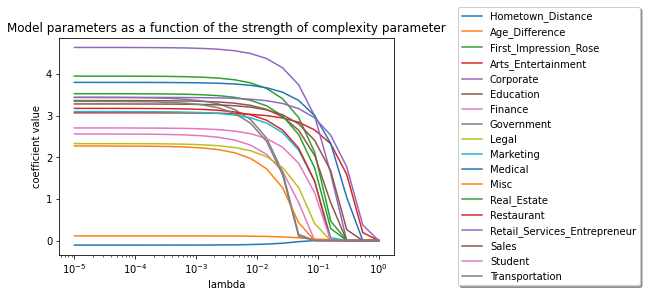

In [108]:
#Code modified from Prof. Michael Albert's notebook on forecasting Clinton-Obama primary

alphas = np.logspace(-5,0, 20)

coefs = []
for a in alphas:
    lm_lasso = Lasso(alpha=a, fit_intercept=False, max_iter=1000000)
    lm_lasso.fit(X_train, Y_train)
    coefs.append(lm_lasso.coef_)
    
ax = plt.gca()

for i in range(len(coefs[0])):
    ax.plot(alphas, [coef[i] for coef in coefs], label=merged_df[Continuous_LinReg_features + Binary_LinReg_features].columns[i])
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('coefficient value')
plt.title('Model parameters as a function of the strength of complexity parameter')
plt.axis('tight')
plt.legend(loc='right', bbox_to_anchor=(1.75, 0.5), shadow=True, ncol=1)
plt.show()

Notice that as our complexity parameter $\lambda$ increases that many of our model parameters, the coefficents, start to shrink towards zero when $10^{-2} \leq \lambda \leq 10^{-1}$. In other words, as we increase the penalty for complexity in our model, some of our predictor variables are effectively removed from our model, making it simpler.

So what is our optimal value for $\lambda$? Thankfully, `sklearn` will tell us this value automatically!

In [109]:
#Prints out the optimal complexity parameter (sklearn calls it alpha but we've been referring to it as lambda)
#It wouldn't be data science if no one could agree on terminology

optimal_lambda = LassoCV_model.alpha_

print("Optimal value for penalty term: " +str(optimal_lambda))

Optimal value for penalty term: 0.029981898816835297


Now that we have our optimal value of our complexity parameter $\lambda$, we have a good sense of the level of complexity that our model should have. Even better, `sklearn` will take the optimal value for our complexity parameter and refit our model to **all of our training data** to find the optimal estimates for our model parameters. So all we need to do now is generate predictions for our test set and estimate our model's performance on unseen data:

In [111]:
#Generate predictions for our model
Lasso_model_predictions = LassoCV_model.predict(X_validate)

In [113]:
MSE(Y_validate, Lasso_model_predictions)

6.249779157798919


Looks like Lasso does a slightly better job than linear regression! It's still not great, but honestly given how little data we have on the contestants, the Bachelors, and how challenging of a problem this is to model, it isn't a bad start!

## Summary of Penalized Regression

Penalized regression is a great next step from linear regression, as it allows us to better control the level of complexity in a model. It can even help us in automatically selecting which predictor variable we want to use in our model!

Pros:
 - Can perform variable selection
 - Helps us control complexity, which prevents overfitting
 - Generally better predictive accuracy compared to Linear Regressions

Cons:
 - Requires finding the complexity parameter
 - More effort to build a model / longer time to train model
 - Slightly harder to interpret / explain compared to a Linear Regression model

# Ordinal Logistic Regression

One thing we've glossed over when reviewing our models is that our response variable, Elimination Week, is more of a ranking than a continuous number. However, the methods we've been using up until this point have been predicting non-integer values:

In [114]:
Lasso_model_predictions

array([3.12240359, 3.12636482, 3.36849546, 3.19217757, 4.05526915,
       2.85244563, 3.35732597, 3.44707974, 3.18496555, 4.07370038,
       3.50410011, 3.28929295, 3.39081755, 3.1602958 , 3.3354714 ,
       3.41551922, 3.26387217, 3.2483695 , 3.30342822, 3.39566036,
       3.40289934, 3.47062137, 3.53605459, 3.3168577 , 3.38740121,
       3.352413  , 3.27029334, 3.39619716, 3.41796233, 3.14643428,
       3.07521573, 3.35751308, 2.98287119, 5.74349159, 3.34445649,
       3.26969254, 3.12498575, 3.36165214, 2.95042414, 2.96437919,
       3.37052605, 2.96636002, 3.32924844, 3.32949986, 6.03229538,
       3.43477846, 3.13246639, 3.31071398, 3.41883699, 3.60832074,
       3.36433642, 3.21796962, 3.10463312, 3.44443102, 3.28040659,
       3.20296268, 3.54517162, 3.96233757, 3.23875946, 3.32068807,
       3.32408271, 3.08910606, 3.34805849, 3.31896613, 3.37971227,
       4.12575856, 2.60146788, 3.71556678, 3.05733471, 3.41746654,
       6.24533987, 3.17734888, 3.27490237, 6.9677617 , 3.22951

Obviously we can't say that a contestant will stay on a show for 3.12 weeks! They can only stay for 3 or 4 weeks. We could simply round these numbers to the nearest integer to compensate for this:

In [115]:
Lasso_model_predictions_rounded = np.round(Lasso_model_predictions)
Lasso_model_predictions_rounded

array([3., 3., 3., 3., 4., 3., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 6.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 6., 3., 3., 3., 3., 4., 3.,
       3., 3., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3., 3., 4., 3., 4.,
       3., 3., 6., 3., 3., 7., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 4.])

In [116]:
MSE(Y_validate, Lasso_model_predictions_rounded)

6.447058823529412


There is another way that we can do this with regression without rounding the result, we could use **Ordinal Logistic Regression**. In essence, Ordinal Logistic Regression is good for predicting ordinal response variables such as Movie Ratings, how an athlete might place in a swimming event, survey responses for on the [likert scale](https://en.wikipedia.org/wiki/Likert_scale), etc. In our case, we are equating a contestant's Elimination Week to a ranking in a competition, since in essence that's what a reality dating TV show is (sorry not sorry).

Ordinal logistic regression looks at calculating the odds that an observation belongs to each ranking, and predicts the ranking that has the most likely value given the data. To use this kind of model, we need to make sure that our data passes the *proportional odds assumption*. To explain this, we first need to understand the difference between **probabilities** and **odds**. 

Probabilities take on values between 0 and 1 and represent the chance of an event occuring. 
 - There will be a 40% chance of rain tomorrow or there is a 90% chance I get cold-called in DA next week.

Odds can take on values between 0 and $\infty$ and represent the ratio of an event occuring divided by an event not occuring. 
 - E.g. I give it 3:1 odds that I messed something up on my DCF on my Finance final.

#### Proportional Odds Assumption

In order for us to use ordinal logistic regression, we need to make sure our data is well-suited for this kind of problem. Without getting too mathy, we want to make sure that our response variable, Elimination Week, is fairly evenly spread out. For the math, check out below (optional):

#### Math (optional)

We want to make sure the *logarithm of the odds* of making it a certain week should be equidistant, or evenly spaced from one another:

Week 1: $log \frac{p_1}{p_2 + p_3 + p_4 + ... + p_{11}} = X$

Week 2: $log \frac{p_1 + p_2}{p_3 + p_4 + p_5 + ... + p_{11}} = X + n$

Week 3: $log \frac{p_1 + p_2 + p_3}{p_4 + p_5 + p_6 ... + p_{11}} = X + 2n $

...

Week 10: $log \frac{p_1 + p_2 + p_3 + p_{10}}{ p_{11}} X + 9n$

Where $X$ can be any value and $n$ is a constant value that represents the equal distance between the log of the odds for each ranking. If $n$ is not consistent between rankings, then this is not a good choice of model for our data.

In [117]:
#Calculating the probabilities of getting eliminated by week by using our contestant data
elim_prob = merged_df.groupby(['ElimWeek'])['ElimWeek'].count() / len(merged_df)
elim_prob

ElimWeek
1     0.347518
2     0.146572
3     0.118203
4     0.099291
5     0.070922
6     0.066194
7     0.054374
8     0.037825
9     0.026005
10    0.016548
11    0.016548
Name: ElimWeek, dtype: float64

In [118]:
#Create a list of values that represent the log odds for each ranking

log_odds_list = []

#Do the first ranking (week 1)
log_odds_list.append(np.log(elim_prob.iloc[0].sum() / elim_prob.iloc[1:].sum()))

#Do the other rankings (weeks 2-10)
for i in range(1, 10, 1):
    log_odds_list.append(np.log(elim_prob.iloc[0:i].sum() / elim_prob.iloc[i+1:].sum()))

In [119]:
#Print the distances between log odds ratios to verify that n is fairly constant

for i in range(0, len(log_odds_list)-1):
    print("Difference between Weeks " + str(i+1) + " and " +str(i+2) + ": " + str(log_odds_list[i+1] - log_odds_list[i]))

Difference between Weeks 1 and 2: 0.2544248506952986
Difference between Weeks 2 and 3: 0.6180112523837279
Difference between Weeks 3 and 4: 0.5103391928256684
Difference between Weeks 4 and 5: 0.4325146707335543
Difference between Weeks 5 and 6: 0.45791360431755557
Difference between Weeks 6 and 7: 0.5265150297665802
Difference between Weeks 7 and 8: 0.5567944619544032
Difference between Weeks 8 and 9: 0.620849891930805
Difference between Weeks 9 and 10: 0.7204103313183094


Excluding the difference between weeks 1 and 2, the other weeks are fairly consistent in terms of distance between the log odds ratios. Thus, we can proceed with modeling this problem as an Ordinal Logistic Regression.

## Implementing Oridinal Logistic Regression

We'll follow virtually the same steps as we did for the Linear Regression model, since the ordinal regression model we are using does not have any complexity parameters. We will be using the `mord` package for our Ordinal Logistic Regression model.

In [120]:
features = ['Hometown_Distance','Age_Difference','First_Impression_Rose']

In [121]:
features = features + categorical_var_list

In [122]:
X = merged_df[features]
Y = merged_df['ElimWeek']

In [123]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size = 0.2, random_state = 37)

In [124]:
Ordinal_Logistic_Model = mord.LogisticAT()

In [125]:
Ordinal_Logistic_Model.fit(X_train, Y_train)

LogisticAT(alpha=1.0, max_iter=1000, verbose=0)

In [126]:
pd.DataFrame(zip(features, Ordinal_Logistic_Model.coef_), columns = ['Feature','Coef'])

,Feature,Coef
0,Hometown_Distance,-0.000066
1,Age_Difference,0.021049
2,First_Impression_Rose,2.607368
3,Arts_Entertainment,0.041277
4,Corporate,0.935663
5,Education,0.213750
6,Finance,-0.494355
7,Government,0.218602
8,Legal,-0.705555
9,Marketing,-0.121826


In [127]:
Ordinal_Logistic_Predictions = Ordinal_Logistic_Model.predict(X_validate)
Ordinal_Logistic_Predictions

array([ 2,  3,  3,  3,  4,  2,  1,  2,  2,  4,  3,  3,  3,  2,  1,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  1,  3,  3,  2,  2,  2,  3,  1,  7,
        2,  2,  2,  2,  2,  2,  3,  1,  1,  2,  8,  3,  1,  3,  3,  3,  3,
        1,  1,  2,  2,  2,  3,  4,  2,  2,  3,  1,  1,  2,  3,  4,  1,  3,
        1,  3,  8,  3,  2, 10,  3,  3,  3,  3,  2,  3,  2,  2,  3,  2,  4])

Note that our model automatically produces integer outputs rather than fractions of a whole number.

In [129]:
MSE(Y_validate, Ordinal_Logistic_Predictions)

7.317647058823529


Looks like this model does not perform as well as Penalized Regression given this test set. 

# Wrap Up

Honestly that was way more material than we were planning to cover for this exercise! In this notebook, we covered:

 - The goals of statistical learning
 - How to use Python
 - Cleaning and manipulating data
 - Visualizing data
 - Building and interpretting Regression Models
 - Fundamental Data Science Concepts
  - Bias-Variance Trade Off
  - Model Complexity
  - Assessing Model Performance
  - Hypothesis Tests
  - p-values
  
Give yourself a pat on the back for making it this far! Hopefully you're able to build an even better model that you can use to win your Bachelor league for years to come.

For more resources and analytics on the Bachelor, be sure to check out some of these resources:

 - [@bachelordata](https://www.instagram.com/bachelordata/?hl=en)

## Data Prep to Make Predictions

So after all the hard work we've done, it's finally time to make predictions with our models! We first need to load in our **test data** for which we'll be making predictions on Season 25:

In [130]:
test_df = pd.read_csv('test_data.csv')

In [131]:
MattJames = pd.DataFrame({'Name':['Matt James'],
                          'Age': [28],
                          'Hometown': ['Raleigh, North Carolina'],
                          'Season': [25]})

MattJames

,Name,Age,Hometown,Season
0,Matt James,28,"Raleigh, North Carolina",25


We need to get our data into the same format as we used for our previous models. This means adding the same features (`Hometown_Distance`, `Age_Difference`, etc) and doing the same cleaning on this data as we did previously.

**Note**: We just copy-pasted this code from above down here, replacing any mention of `contestant_df` with `test_df` and `bachelor_df` with `MattJames`.

In [132]:
# create location column
test_df['location'] = test_df['Hometown'].apply(geocode)
# create longitude, laatitude and altitude from location column (returns tuple)
test_df['point'] = test_df['location'].apply(lambda loc: tuple(loc[1]) if loc else None)
# split point column into latitude, longitude columns
test_df[['latitude', 'longitude']] = pd.DataFrame(test_df['point'].tolist(), index=test_df.index)

In [133]:
#Run this for Bachelors

# create location column
MattJames['location'] = MattJames['Hometown'].apply(geocode)
# create longitude, laatitude from location column (returns tuple)
MattJames['point'] = MattJames['location'].apply(lambda loc: tuple(loc[1]) if loc else None)
# split point column into latitude, longitude columns
MattJames[['latitude', 'longitude']] = pd.DataFrame(MattJames['point'].tolist(), index=MattJames.index)

In [134]:
test_df = test_df.drop(['latitude','longitude','location'], axis = 1)

In [135]:
MattJames = MattJames.drop(['latitude','longitude','location'], axis = 1)

In [136]:
test_df['State/Country'] = test_df['Hometown'].str.split(',').str[1]

Now let's add some logic to flag contestants who are international:

In [137]:
#Regex search terms for non-US countries
non_us_terms = ['Quebec','Italy','British Columbia','Alberta','Pernambuco','England','Brazil','Ontario', 'Ethiopia']
    
#Logic to check State/Country for regex terms. Returns 1 (US) or 0 (non=US)    
test_df['International_Flag'] = ((test_df['State/Country'].str.contains('|'.join(non_us_terms))) | (test_df['State/Country'].isna())).astype(int)

In [138]:
test_df = test_df.drop(['State/Country'], axis = 1)

In [139]:
MattJames['State/Country'] = MattJames['Hometown'].str.split(',').str[1]

In [140]:
#Logic to check State/Country for regex terms. Returns 1 (US) or 0 (non=US)    
MattJames['International_Flag'] = (MattJames['State/Country'].str.contains('|'.join(non_us_terms)) | MattJames['State/Country'].isna()).astype(int)

In [141]:
MattJames = MattJames.drop(['State/Country'], axis = 1)

Let's join these datasets together with `pd.merge` on season. But before doing so, let's rename some of these columns so that we don't have duplicates in our new dataframe.

In [142]:
#Mapping of old names (on left) and new names (on right)
contestant_rename_map = {'Name':'Contestant_Name',
                        'Age':'Contestant_Age',
                        'Hometown':'Contestant_Hometown',
                        'point':'Contestant_Hometown_Coordinates',
                        'International_Flag':'Contestant_International_Flag'}

#Rename the columns in the dataframe, axis = 1 is telling Pandas to look at column labels
test_df = test_df.rename(contestant_rename_map, axis = 1)

In [143]:
#Mapping of old names (on left) and new names (on right)
bachelor_rename_map = {'Name':'Bachelor_Name',
                        'Age':'Bachelor_Age',
                        'Hometown':'Bachelor_Hometown',
                        'point':'Bachelor_Hometown_Coordinates',
                        'International_Flag':'Bachelor_International_Flag'}

#Rename the columns in the dataframe, axis = 1 is telling Pandas to look at column labels
MattJames = MattJames.rename(bachelor_rename_map, axis = 1)

Now let's merge these datasets together now that we have unique column names.

In [144]:
merged_test_df = test_df.merge(MattJames, on = 'Season')

In [145]:
#Calculate the age difference between a Bachelor and the contestant
merged_test_df['Age_Difference'] = merged_test_df['Bachelor_Age'] - merged_test_df['Contestant_Age']

In [146]:
merged_test_df['Hometown_Distance'] = merged_test_df.apply(lambda row: gp_distance.distance(row['Contestant_Hometown_Coordinates'], row['Bachelor_Hometown_Coordinates']).miles, axis = 1)

In [147]:
#Creates our 15 distinct columns, one for each function, and does so for each contestant (423 contestants)
sparse_matrix = dummy_encoder.transform(np.array(merged_test_df['Function']).reshape(-1,1)).toarray()

In [148]:
#Convert this into a pandas dataframe so we can join it back with the merged_df
sparse_df = pd.DataFrame(data = sparse_matrix, columns = dummy_encoder.categories_)

In [149]:
merged_test_df = merged_test_df.merge(sparse_df, left_index = True, right_index = True)

In [150]:
#Clean up the column names by removing special characters like "(", ")", "," , and "''"
merged_test_df = merged_test_df.rename(columns = lambda x: re.sub(r'[(),\']',r'',str(x)))

#Replace spaces with underscores
merged_test_df = merged_test_df.rename(columns = lambda x: re.sub(r' ',r'_',str(x)))

#Replace slashes with underscores
merged_test_df = merged_test_df.rename(columns = lambda x: re.sub(r'/',r'_',str(x)))

## Making Predictions

We can make predictions with Linear Regression, Penalized Regression, and Ordinal Logistic Regression using the `predict` function.

Linear Regression predictions

In [152]:
LinRegModel_Season25_Predictions = LinReg_Model6_Results.predict(merged_test_df)

Lasso Penalized Regression predictions (need to standardize our data first)

In [153]:
#Here we define a list of continuous features that we want to scale
#We do not need to standardize our binary features (i.e. First_Impression_Rose)
Continuous_LinReg_features = ['Hometown_Distance','Age_Difference']

In [154]:
#Create a dataset with our scaled data
X_test_scaled = scaler.transform(merged_test_df[Continuous_LinReg_features])

In [155]:
#Simply selecting the binary features of our data and converting into a numpy array
X_test_binary = np.array(merged_test_df[Binary_LinReg_features])

In [156]:
#Now we are merging our two datasets together into one
X_test_penalized = np.concatenate((X_test_scaled, X_test_binary), axis = 1)

In [158]:
PenalizedRegModel_Season25_Predictions = LassoCV_model.predict(X_test_penalized)

Ordinal Logistic Regression Predictions

In [159]:
OrdLogRegModel_season25_Predictions = Ordinal_Logistic_Model.predict(merged_test_df[features])

## Save and Submit your Predictions

In [160]:
#Replace with the your model predictions where "OrdLogRegModel_season25_Predictions" currently is
FINAL_PREDICTIONS = pd.DataFrame({'Name': merged_test_df['Contestant_Name'],
                                  'ElimWeek': OrdLogRegModel_season25_Predictions})

In [161]:
FINAL_PREDICTIONS

,Name,ElimWeek
0,Abigail,1
1,Alana,2
2,Alicia,2
3,Amber,3
4,Anna,2
5,Bri,4
6,Carolyn,2
7,Casandra,2
8,Chelsea,2
9,Corrinne,2


You should have one prediction per contestant (we are excluding contestants who show up in the middle of the season from this contest). In total, your prediction dataset should have 32 rows and 2 columns:

In [162]:
FINAL_PREDICTIONS.shape

(32, 2)

In [163]:
#Write the output to a csv file for your submission
#PLEASE INCLUDE YOUR FIRST AND LAST NAME IN THE FILE NAME SO WE KNOW WHO TO GIVE PRIZES TO
FINAL_PREDICTIONS.to_csv('Charlie_Putnam_predictions.csv', index = False)